<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Install-and-load-necessary-libraries" data-toc-modified-id="Install-and-load-necessary-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Install and load necessary libraries</a></span></li></ul></li><li><span><a href="#Create-our-AHP-Tree" data-toc-modified-id="Create-our-AHP-Tree-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create our AHP Tree</a></span></li><li><span><a href="#Some-basic-analysis" data-toc-modified-id="Some-basic-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Some basic analysis</a></span></li></ul></div>

# Introduction

This [Jupyter](https://jupyter.org) notebook performs the analysis of Dr. Bill Adams' and Dr. Jay Stryker consumer choice AHP model for cell phones (see [github.com/wjladams/consumerAHP](https://github.com/wjladams/consumerAHP))

## Install and load necessary libraries

In [ ]:
%pip install pyanp

In [1]:
from pyanp import ahptree
import numpy as np
import pandas as pd
import re
from copy import deepcopy
from helpers import *
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (12,7)

# Create our AHP Tree

In [4]:
from io import BytesIO

import requests
r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1oLTZ2RBfms0jkvMR0dg1_A6TEs8KipXdma_XyUIcF4o&output=csv')
#r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1jxuBHUYA8Jy5iSRx2PZ7lNg0Ag2gf-cC63LoCCru-j4&output=csv')
data = r.content
df = pd.read_csv(BytesIO(data))
df.tail()

,Timestamp,My Current Job vs A Possible New Job wrt Work/life balance,My Current Job vs A Possible New Job wrt Relationships with coworkers and management,My Current Job vs A Possible New Job wrt Salary,My Current Job vs A Possible New Job wrt Professional fulfillment,Work/life balance vs Relationships with coworkers and management,Relationships with coworkers and management vs Salary,Salary vs Professional fulfillment,Work/life balance vs Salary,Relationships with coworkers and management vs Professional fulfillment,Work/life balance vs Professional fulfillment,Name,Age,Location
0,3/14/2021 15:14:42,A Possible New Job is better,My Current Job is better,A Possible New Job is much better,A Possible New Job is better,Work/life balance is much more important,Salary is more important,Professional fulfillment is more important,Salary is more important,Professional fulfillment is more important,Work/life balance is more important,Phil,20-29,Central America
1,3/14/2021 16:40:35,My Current Job is much better,A Possible New Job is better,They are basically equal,A Possible New Job is much better,Work/life balance is much more important,Salary is more important,Salary is more important,Work/life balance is much more important,Professional fulfillment is more important,Professional fulfillment is much more important,John,Under 20,South America


* We need to convert the votes

In [6]:
for col in df.columns:
    if re.search(r'\s+vs\s+',col):
        df[col] = betterScaleDataToNumeric(col, df[col])
df

,Timestamp,My Current Job vs A Possible New Job wrt Work/life balance,My Current Job vs A Possible New Job wrt Relationships with coworkers and management,My Current Job vs A Possible New Job wrt Salary,My Current Job vs A Possible New Job wrt Professional fulfillment,Work/life balance vs Relationships with coworkers and management,Relationships with coworkers and management vs Salary,Salary vs Professional fulfillment,Work/life balance vs Salary,Relationships with coworkers and management vs Professional fulfillment,Work/life balance vs Professional fulfillment,Name,Age,Location
0,3/14/2021 15:14:42,0.5,2.0,0.2,0.5,5.0,0.5,0.5,0.5,0.5,2.0,Phil,20-29,Central America
1,3/14/2021 16:40:35,5.0,0.5,1,0.2,5.0,0.5,2.0,5.0,0.5,0.2,John,Under 20,South America


In [7]:
ahp = ahptree.ahptree_fromdf(df)
ahp

# Some basic analysis

<AxesSubplot:>

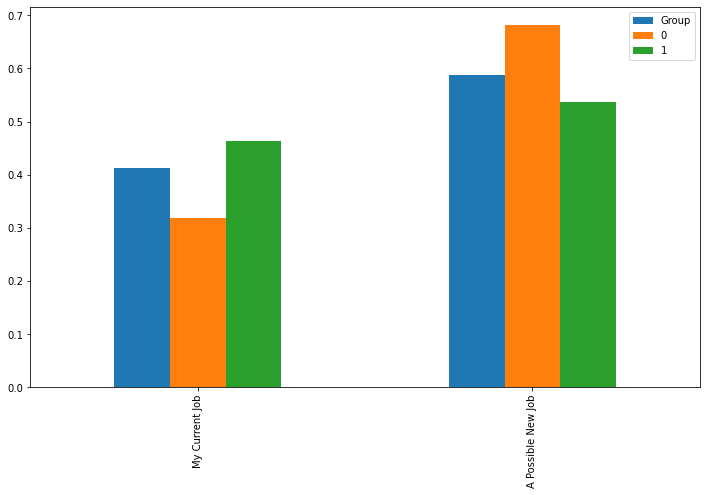

In [8]:
altscores = ahp.priority_table()
altscores.plot(kind="bar")